In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def clean_power_series(aggregate_power, activations):
    #aggregate_power.index = pd.to_datetime(aggregate_power.index,unit='s')
    #activations['start'] = pd.to_datetime(activations['start'],unit='s')
    #activations['end'] = pd.to_datetime(activations['end'],unit='s')
    
    temp_ap = aggregate_power.copy()
    
    n = activations.shape[0]

    pcent = int(n/100)
    ap_sans_activations = pd.DataFrame()
    
    ap_sans_activations.append(temp_ap[:activations['start'][0]])
    
    for i in range(1,n):
        if i % pcent == 0:
            print(str(i/pcent) + '%')
        ap_sans_activations = ap_sans_activations.append(temp_ap[activations['end'][i-1]:activations['start'][i]])
    
    ap_sans_activations.append(temp_ap[activations['end'][i]:])
    
    return ap_sans_activations

def get_appliance_signatures(aggregate_power, activations):
    
    signatures = []
    for i in range(activations.shape[0]):
        start = activations['start'][i]
        end = activations['end'][i]
        signatures.append(aggregate_power[start:end])
        
    return signatures
        
def make_syntethic_data(aggregate_power, activations, n = 10000, ap_sans_activations = None, sample_length = 128):
    if ap_sans_activations is None:
        ap_sans_activations = clean_power_series(aggregate_power, activations)
    
    app_signatures = get_appliance_signatures(aggregate_power, activations)
    sign_len = len(app_signatures)
    
    syntethic_data = []
    syntethic_response = []
    for i in range(n):
        app_no = np.random.randint(0,sign_len-1)
        sample_start = np.random.randint(0,ap_sans_activations.shape[0]-(sample_length+1))
        sample_end = sample_start + sample_length
        
        sample_start_time = ap_sans_activations.index[sample_start]
        sample_end_time = ap_sans_activations.index[sample_end]
        
        
        sample = ap_sans_activations.loc[sample_start_time:sample_end_time]
        signal = app_signatures[app_no]

        signal_start = np.random.randint(0,sample_length - (signal.shape[0] + 1))
        signal_end = signal_start + signal.shape[0]
        sample.iloc[signal_start:signal_end] += signal.values
        
        syntethic_data.append(sample)
        syntethic_response.append(pd.DataFrame([signal_start,signal_end,signal.mean()]))
        
    return syntethic_data, syntethic_response
    

In [4]:
activations = pd.read_csv('../master_data/nilm/kettle_activations.dat', #header = None,
                                delim_whitespace = True,
                                names = ['index', 'start','end','mean_power'],
                                index_col = 0)
aggregate_power = pd.read_csv('../master_data/house_1/channel_1.dat', header = None,
                                names = ["Time","Power"], delim_whitespace = True,
                                index_col = 0)
kettle_signal = pd.read_csv('../master_data/house_1/channel_10.dat', header = None,
                                names = ["Time","Power"], delim_whitespace = True,
                                index_col = 0)

/home/bjornif/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
aggregate_power.index = pd.to_datetime(aggregate_power.index,unit='s')
kettle_signal.index = pd.to_datetime(kettle_signal.index,unit='s')
#activations['start'] = pd.to_datetime(activations['start'],unit='s')
#activations['end'] = pd.to_datetime(activations['end'],unit='s')


In [6]:
activations = activations.loc[1:]
activations = activations.reset_index(drop=True)
activations.head(5)

,start,end,mean_power
0,2012-11-10 17:22:40,2012-11-10 17:24:05,2282.692308
1,2012-11-11 08:28:41,2012-11-11 08:30:47,2261.200000
2,2012-11-11 11:35:09,2012-11-11 11:38:09,2282.896552
3,2012-11-11 11:44:35,2012-11-11 11:46:59,2285.956522
4,2012-11-12 08:59:55,2012-11-12 09:02:43,2329.851852


2012-11-10 17:22:40 2012-11-10 17:24:05


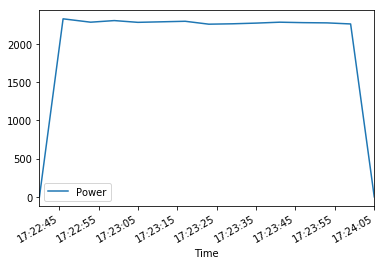

In [7]:
for i in range(1):
    start = activations['start'][i]
    end = activations['end'][i]
    print(start,end)
    kettle_signal[start:end].plot()
    plt.show()

In [8]:
clean_ap = clean_power_series(aggregate_power, activations)

1.0%
2.0%
3.0%
4.0%
5.0%
6.0%
7.0%
8.0%
9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%
100.0%
101.0%
102.0%


In [9]:
syntethic_data, syntethic_response = make_syntethic_data(aggregate_power, activations, n=10000,
                                     ap_sans_activations = clean_ap, sample_length = 128)

/home/bjornif/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/bjornif/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
syntethic_data_pd = pd.DataFrame(syntethic_data)
syntethic_data_pd.to_csv('../master_data/syntethic_data.dat', sep=' ')
syntethic_response_pd = pd.DataFrame(syntethic_response)
syntethic_response_pd.to_csv('../master_data/syntethic_response.dat', sep=' ')